# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [63]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [64]:
var = 'Sales'

1) 변수의 비즈니스 의미

> * 각 지역 판매량(단위 : 1000개)
> * Target

2) 숫자, 범주?

> * 숫자

3) NaN 존재 유무 및 조치방안

In [65]:
data[var].isna().sum()

0

> * NaN 존재하지 않음

4) 가변수화 필요 여부

> * 숫자형이기 때문에 필요없음

5) 기초통계량(수치화)

In [66]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

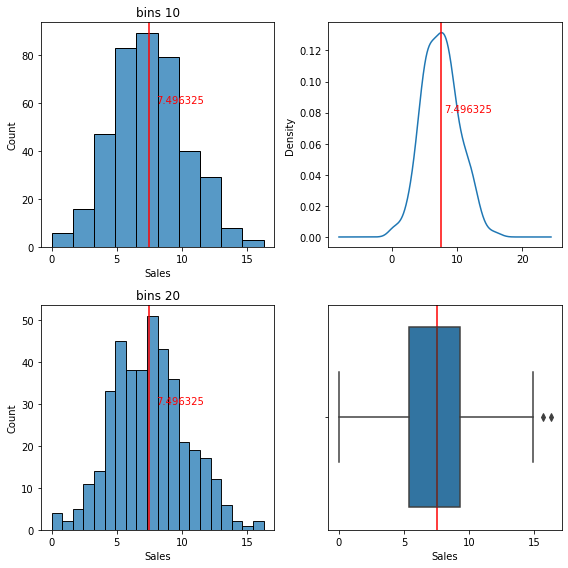

In [88]:
import warnings   
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5 , 60, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.08, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 30, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(50% 이상)이 5,000 ~ 10,000개의 판매량을 보였다.
    * 지역마다의 구매력이 비슷하다고 유추해볼 수 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 구간을 나눠서 판매량을 비교해볼 필요가 있다.
> * price(자사 지역별 판매가격)와 같이 분석해볼 필요가 있다.

### ② CompPrice

In [91]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [92]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [93]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

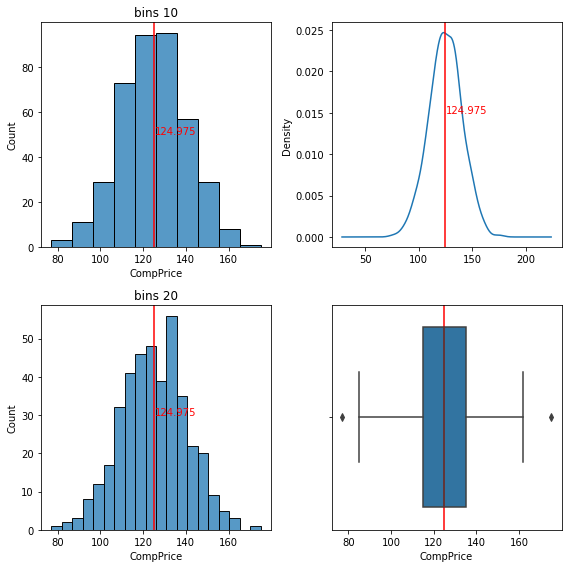

In [98]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5 , 50, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.015, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 30, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 경쟁사의 가격은 77~175불 사이이다.
> * 경쟁사의 가격은 대부분 110~140불임을 확인할 수 있다.
    * 이외의 구간에 있는 가격들에 대해서 원인을 알아볼 필요가 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 가격 차이가 제품의 차이인지 지역별 할인 차이인지 추가 분석해볼 필요가 있다.
> * 자사 지역별 판매가격과 같이 비교해볼 필요가 있다.

### ③ Income

In [101]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [102]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [103]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

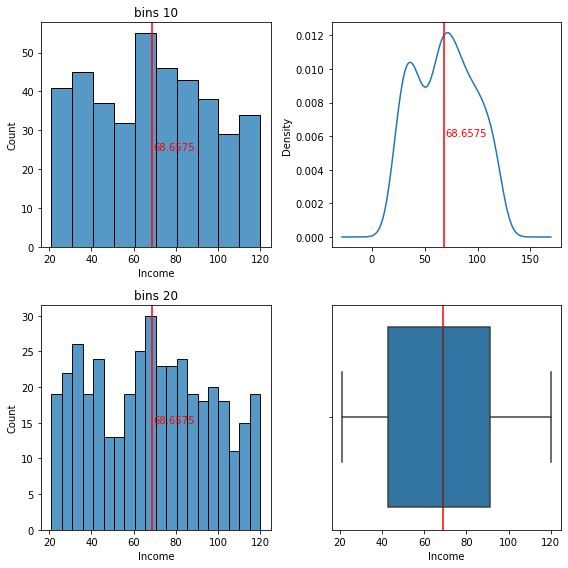

In [105]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 25, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.006, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 15, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 지역별 평균소득은 21,000 ~ 120,000불 사이이다.
    * 따라서 연평균 소득일 것이다.
> * 대부분이 약 40,000 ~ 90,000불 사이이다.
> * 누구의 연평균 소득인지 알아볼 필요가 있다.
    * 신혼부부 대상인지 등에 대해 알아볼 필요가 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 연평균 소득의 대상과 카시트 간의 상관관계를 분석해볼 필요가 있다.

### ④ Advertising

In [106]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [107]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [108]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

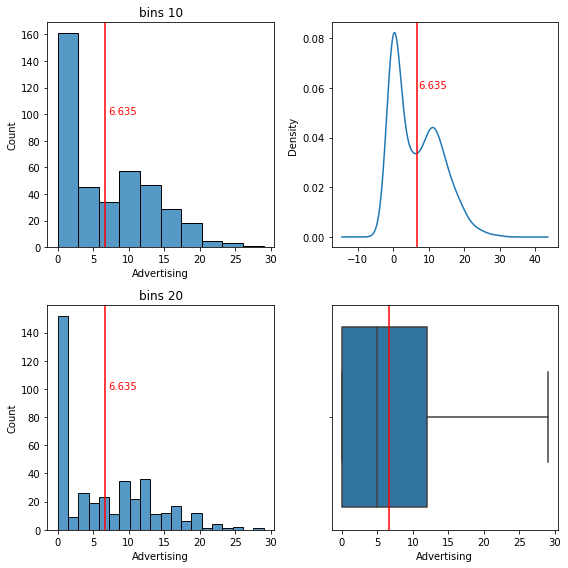

In [110]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 100, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.06, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 100, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 회사의 광고 예산이 0불인 지역들(최소 25%)이 있다.
    * 이들과 29,000불인 지역에 대해서 분석해볼 필요가 있다.
> * 대부분(50% 이상)의 지역에서 회사 광고 예산이 평균보다 적다.
    * 평균보다 더 예산을 투입하는 지역들에 대해서 알아볼 필요가 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 광고 예산이 0불인 지역을 제외하고 분포를 살펴볼 필요가 있다.
> * 지역별 인구수, 광고 타겟층, 평균소득 등과 비교해볼 필요가 있다.

### ⑤ Population

In [112]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [113]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [114]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

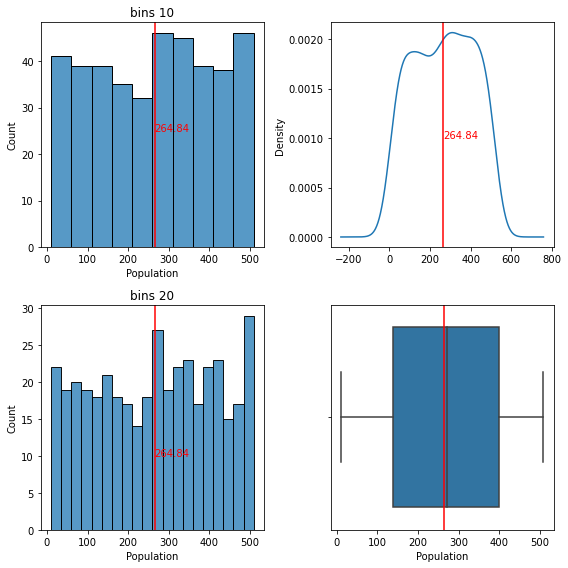

In [116]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 25, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.001, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 10, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 가장 적은 지역은 10,000명, 가장 많은 지역은 509,000명이다.
> * 대부분의 지역에 약 140,000~400,000명이 거주하고 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 연령대를 알아볼 필요가 있다.
    * 결혼여부를 알아볼 필요가 있다.
> * 회사 광고예산과 비교해볼 필요가 있다.

### ⑥ Price

In [117]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매가격

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [118]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [119]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

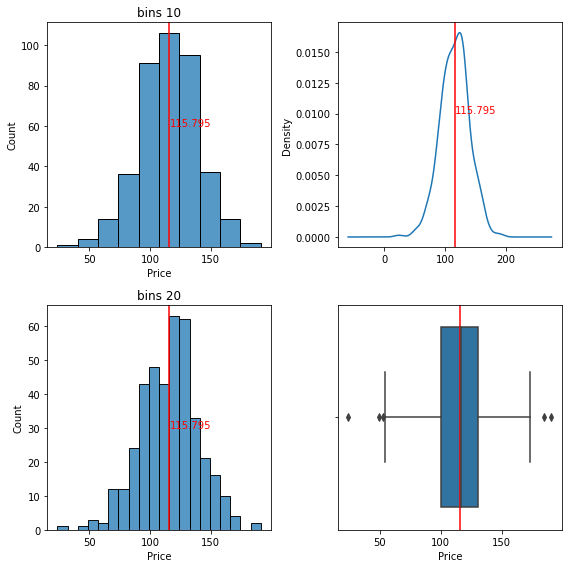

In [121]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 60, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.01, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 30, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(약 50%) 지역에서 100~130불에 팔고 있다.
> * 가장 싼 지역에서는 24불, 가장 비싼 지역에서는 191불이다.
    * 지역별로 가격차이가 왜 이렇게 나는지 알아볼 필요가 있다.
        * 제품의 종류 차이인지, 지역별 할인을 다르게 한 것인지 등
> * 경쟁사의 경우 77~175불 사이에서 팔고 있다.
    * 경쟁사보다 가격대가 다양한 이유에 대해 알아볼 필요가 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 지역별 광고예산, 평균소득 등과 비교해볼 필요가 있다.
> * 같은 지역에서 경쟁사 가격과 비교해볼 필요가 있다.

### ⑦ ShelveLoc

In [153]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [154]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

In [155]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

* 가변수화 필요

5) 기초통계량(수치화)

In [156]:
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

6) 분포 확인(시각화)

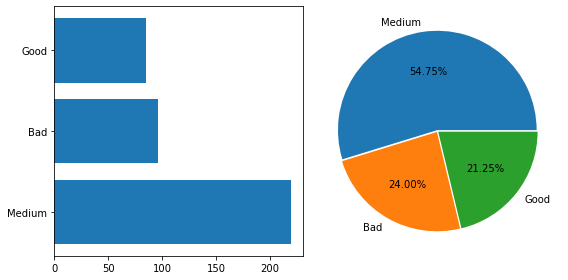

In [157]:
cnt = data[var].value_counts()  # 집계를 먼저 해야한다.

plt.figure(figsize = (8,4))

plt.subplot(1, 2, 1)
plt.barh(cnt.index, cnt.values)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', explode = [0.01, 0.01, 0.01])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 매장진열상태를 어떤 기준으로 나눴는지 알아볼 필요가 있다.
> * 좋음: 21.25%, 보통: 54.75%, 나쁨: 24.00%
    * 진열상태가 안 좋은 곳은 왜 안 좋은 지 알아볼 필요가 있다.

8) 추가 분석해 볼 사항이 있나요?

> * 매장진열상태가 판매량과 어떤 관계가 있는지 알아볼 필요가 있다.

### ⑧ Age

In [122]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [123]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

* 필요없음

5) 기초통계량(수치화)

In [124]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

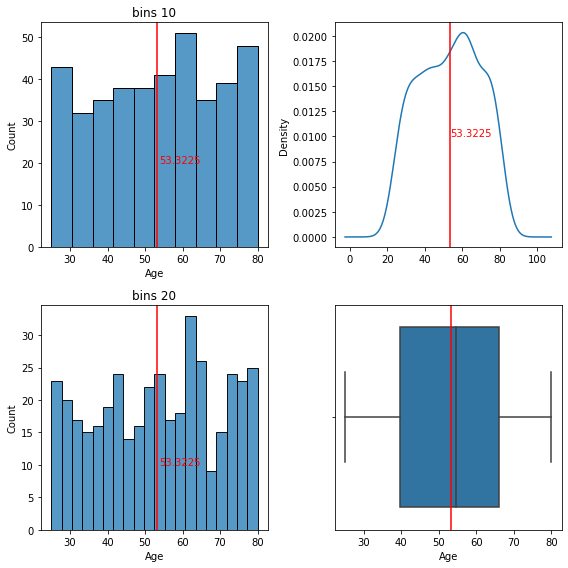

In [126]:
warnings.filterwarnings("ignore")

mean = data[var].mean()

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var], bins = 10)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 20, mean, color='r')
plt.title('bins 10')

plt.subplot(2,2,2)
data[var].plot(kind = 'kde')
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 0.01, mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data[var], bins = 20)
plt.axvline(mean, color='red', linestyle='-')
plt.text(mean + 0.5, 10, mean, color='r')
plt.title('bins 20')

plt.subplot(2,2,4)
sns.boxplot(data[var])
plt.axvline(mean, color='red', linestyle='-')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 평균연령이 가장 낮은 지역은 25세, 가장 높은 지역은 80세이다.
> * 대부분의 지역(약 50%)에서 약 40~66세가 평균연령이다.
    * 이 경우보다, 오히려 나머지 지역들에서 카시트를 살 확률이 더 높다.
    * 평균연령 25세인 경우 아이를 가진 신혼부부, 평균연령 80세인 경우 손주를 가진 노부부일 확률이 크다.

8) 추가 분석해 볼 사항이 있나요?

> * 광고비 예산, 결혼여부, 자녀여부 등과 비교해볼 필요가 있다.
> * 카시트가 필요한 연령의 자녀 또는 손주(10세 미만)를 둔 가정들만 평균 연령대를 구해볼 필요가 있다.
    * 연령대에 따라 구매력이 달라짐

### ⑨ Urban

In [158]:
var = 'Urban'

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [145]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

In [146]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 가변수화 필요

5) 기초통계량(수치화)

In [147]:
data[var].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

6) 분포 확인(시각화)

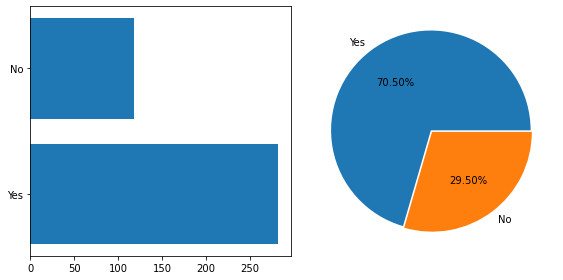

In [159]:
cnt = data[var].value_counts()

plt.figure(figsize = (8,4))

plt.subplot(1, 2, 1)
plt.barh(cnt.index, cnt.values)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', explode = [0.01, 0.01])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 도심인 지역이 70.5%, 아닌 지역이 29.5% 분포를 보이고 있다.
> * 도심이 아닌 지역의 평균연령이 고령일 것으로 추정
> * 도심이 아닌 지역에 대해 광고비 예산이 0원으로 편성되었을 것으로 추정

8) 추가 분석해 볼 사항이 있나요?

> * 광고비 예산, 평균연령, 인구수, 소득수준 등과 비교해볼 필요가 있다.
> * 차량 소유 여부를 파악해볼 필요가 있다.

### ⑩ US

In [163]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [56]:
data[var].isna().sum()

0

* NaN 존재하지 않음

4) 가변수화 필요 여부

In [57]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 가변수화 필요

5) 기초통계량(수치화)

In [58]:
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

6) 분포 확인(시각화)

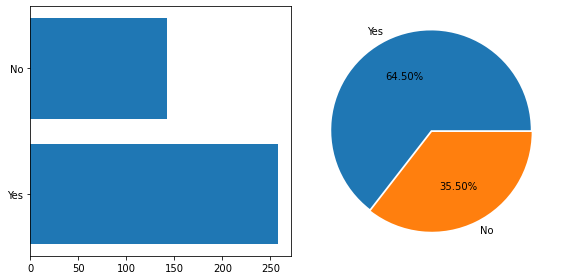

In [162]:
cnt = data[var].value_counts()

plt.figure(figsize = (8,4))

plt.subplot(1, 2, 1)
plt.barh(cnt.index, cnt.values)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', explode = [0.01, 0.01])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 64.5%의 매장이 미국에 있다.
    * 미국은 땅이 크기때문에 차량을 소유하고 있을 확률이 크다.
        * 카시트를 사기 위해선 차량이 필요하다.

8) 추가 분석해 볼 사항이 있나요?

> * 판매량과 비교해볼 필요가 있다.
> * 국내외 매장 간 자사 가격, 경쟁사 가격, 광고비 예산 등과 비교해볼 필요가 있다.